PCA używa się głównie do redukcji wymiarowości dużych danych - takich o wielu atrybutach. Możemy wówczas zwizualizować dane np. na 2 najważniejszych współrzędnych jak również dokonać innych operacji np. klasyfikacji.

Pobierzemy sobie ulubione dane z repozytorium UCI w celu zobrazowania działania. Proszę zobaczyć co oznaczają poszczególne atrybuty i klasa. Następnie proszę zapisać do osobnych numpy array atrybuty oraz klasy

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['1', '2', '3', '4', 'class']
df.dropna(how="all", inplace=True) # usuwamy puste rekordy

print(df['class'].unique())
print(df.shape)
df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(150, 5)


,1,2,3,4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Podział tabelki na dane i etykiety (klasy).

In [7]:
#.values return a numpy representation of DataFrame 
#.iloc Purely integer-location based indexing for selection by position.

X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

print(X[:5, :])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Próbujemy zobaczyć jak wyglądają nasze dane. W tym celu dla każdego atrybutu rysujemy histogramy poszczególnych klas. Czy problem klasyfikacji tego zbioru jest łatwy czy trudny?

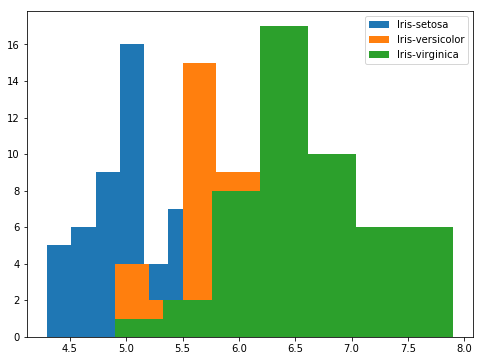

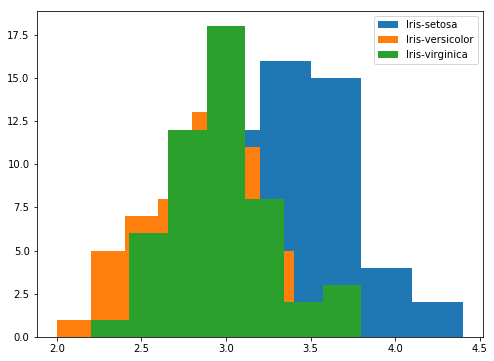

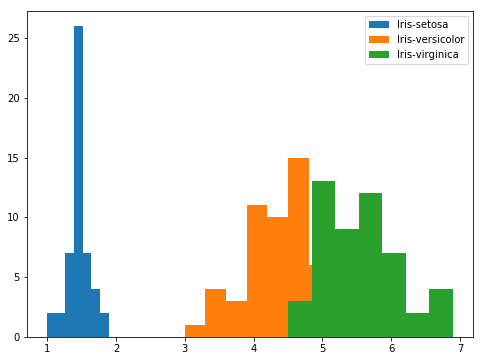

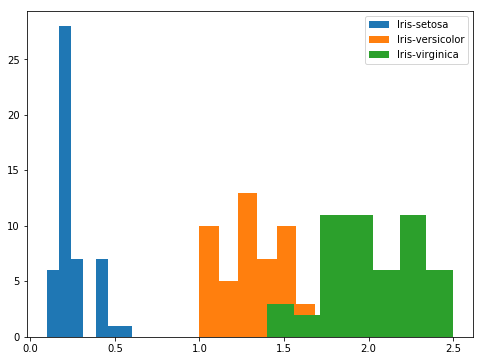

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(8,6))
plt.hist(X[np.where(y == 'Iris-setosa')[0], 0], bins=7, label='Iris-setosa')
plt.hist(X[np.where(y == 'Iris-versicolor')[0], 0], bins=7, label='Iris-versicolor')
plt.hist(X[np.where(y == 'Iris-virginica')[0], 0], bins=7, label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

fig = plt.figure(figsize=(8,6))
plt.hist(X[np.where(y == 'Iris-setosa')[0], 1], bins=7, label='Iris-setosa')
plt.hist(X[np.where(y == 'Iris-versicolor')[0], 1], bins=7, label='Iris-versicolor')
plt.hist(X[np.where(y == 'Iris-virginica')[0], 1], bins=7, label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

fig = plt.figure(figsize=(8,6))
plt.hist(X[np.where(y == 'Iris-setosa')[0], 2], bins=7, label='Iris-setosa')
plt.hist(X[np.where(y == 'Iris-versicolor')[0], 2], bins=7, label='Iris-versicolor')
plt.hist(X[np.where(y == 'Iris-virginica')[0], 2], bins=7, label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

fig = plt.figure(figsize=(8,6))
plt.hist(X[np.where(y == 'Iris-setosa')[0], 3], bins=7, label='Iris-setosa')
plt.hist(X[np.where(y == 'Iris-versicolor')[0], 3], bins=7, label='Iris-versicolor')
plt.hist(X[np.where(y == 'Iris-virginica')[0], 3], bins=7, label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

Zwizualizujmy dane w oparciu o dwie ostatnie współrzędne (na płaszczyźnie) - odrębnymi kolorami zaznaczamy instancje różnych klas.

Dążymy do redukcji wymiarowości danych. Sprawdźmy ile wariancji irysów  wyjaśniają poszczególne komponenty irysów. Które komponenty są najważniejsze. Pamiętajmy o normalizacji danych.

In [9]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(X_std[:5, :])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [10]:
from sklearn.decomposition import PCA as pca
pca_model = pca(n_components=4)
pca_model.fit(X_std)

print(pca_model.explained_variance_)
print(pca_model.components_)
print(pca_model.explained_variance_ratio_)
print(pca_model.explained_variance_ratio_[0] + pca_model.explained_variance_ratio_[1])

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
[0.72770452 0.23030523 0.03683832 0.00515193]
0.9580097536148199


Dokonać redukcji wymiarowości do takiej liczby komponentów które wyjaśniają co najmniej 95% wariancji - można tego zarządać ustawiając parametr "n_components"

In [11]:
pca_model = pca(n_components = 0.95)
X_pca = pca_model.fit_transform(X_std)

print(pca_model.explained_variance_)
print(pca_model.components_)
print(pca_model.explained_variance_ratio_)

[2.93035378 0.92740362]
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
[0.72770452 0.23030523]


Narysujmy zredukowane dane - odrębnymi kolorami zaznaczamy przykłady różnych klas. Czy problem klasyfikacji jest trudny?

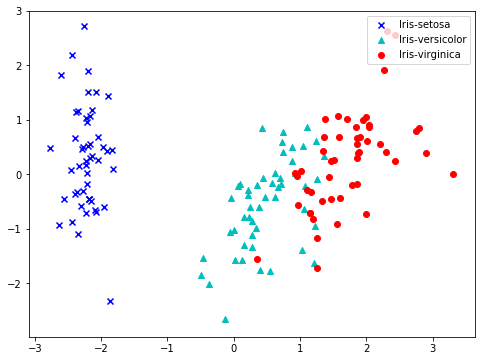

In [13]:
colors = ['b', 'c', 'r']
fig = plt.figure(figsize=(8,6))
plt.scatter(X_pca[np.where(y == 'Iris-setosa')[0], 0], X_pca[np.where(y == 'Iris-setosa')[0], 1],
            marker='x', color=colors[0], label='Iris-setosa')
plt.scatter(X_pca[np.where(y == 'Iris-versicolor')[0], 0], X_pca[np.where(y == 'Iris-versicolor')[0], 1], 
            marker='^', color=colors[1], label='Iris-versicolor')
plt.scatter(X_pca[np.where(y == 'Iris-virginica')[0], 0], X_pca[np.where(y == 'Iris-virginica')[0], 1], 
            marker='o', color=colors[2], label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);



Spróbować także dokonać wizualizacji w oparciu o mniej znaczące komponenty np. drugi i trzeci w kolejności. 

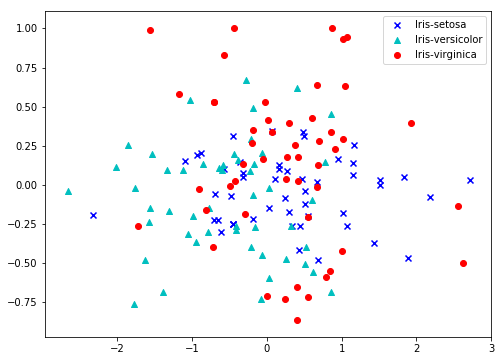

In [14]:
pca_model = pca(n_components = 3)
X_pca = pca_model.fit_transform(X_std)

X_red23 = X_pca[:,1:3]

colors = ['b', 'c', 'r']
fig = plt.figure(figsize=(8,6))
plt.scatter(X_red23[np.where(y == 'Iris-setosa')[0], 0], X_red23[np.where(y == 'Iris-setosa')[0], 1],
            marker='x', color=colors[0], label='Iris-setosa')
plt.scatter(X_red23[np.where(y == 'Iris-versicolor')[0], 0], X_red23[np.where(y == 'Iris-versicolor')[0], 1], 
            marker='^', color=colors[1], label='Iris-versicolor')
plt.scatter(X_red23[np.where(y == 'Iris-virginica')[0], 0], X_red23[np.where(y == 'Iris-virginica')[0], 1], 
            marker='o', color=colors[2], label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

Jakość redukcji można ocenić poprzez wizualizację. Jeśli klasy się dobrze separują to można mieć nadzieję że redukcja jest dobra. 

Wizualizację można przeprowadzić tylko w 2D. Często chcemy redukować do większej ilości wymiarów, bo 2 niewystarcza do opisu danych. Wówczas możemy ocenić jakość redukcji poprzez klasyfikację. Jeśli klasyfikator liniowy na pełnych danych daje podopną dokładność jak ten na zredukowanych, to redukcja jest ok.

Co można powiedzieć na temat możliwości klasyfikacji tych danych? Czy klasy są liniowo separowalne? Która z nich jest łatwa do wykrycia a która trudna?

Zadanie: Proszę użyć klasyfikatora logistycznej regresji do klasyfikacji powyższych danych. Proszę pamiętać, że nie testujemy klasyfikatora na tych samych przykładach co uczymy. 

Proszę najpierw podzielić dane na zbiór treningowy i testowy w proporcji 4:1. 

1. Uczymy klasyfikator na danych pełnych, testuejmy i liczymy accuracy. 
2. Prosze dopasować model PCA do zbioru treningowego i na tej podstawie dokonać redukcji zbioru treningowego i testowego (absolutnie nie wolno używać zbioru testowego do uczenia modelu, bo w praktyce nie jest on dostępny). Uczymy model i testujemy na zredukowanych danych.

Jeśli ktoś ma nadmiar czasu to robimy walidację krzyżową hiperparametru logistycznej regresji.

Spróbować także dokonać klasyfikacji w oparciu o mniej znaczące komponenty. Jeśli chcemy dokonać redukcji w oparciu o 2 i 3 komponent to redukujemy dane do 3 komponentów, a nastepnie wybieramy atrybut 2 i 3. Wtedy pozbędziemy się najbardziej znaczącego. Prosze ponownie dokonać klasyfikacji.

In [10]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape[0])
print(X_test.shape[0])

120
30


In [1]:
pca_model.fit(X_train)
Z_train = pca_model.tansform(X_train)

NameError: name 'pca_model' is not defined

In [11]:
logreg = linear_model.LogisticRegression(C=1e5) # w prakcy powinniśmy dopasować parametr c
logreg.fit(Z_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score

y_train_pred = logreg.predict(X_train)
print("Dokładność na zbiorze treningowym ", accuracy_score(y_train, y_train_pred))



Z_test = pca_model.transform(X_test)
y_test_pred = logreg.predict(Z_test)
print("Dokładność na zbiorze testowym ", accuracy_score(y_test, y_test_pred))

Dokładność na zbiorze treningowym  1.0
Dokładność na zbiorze testowym  0.933333333333


Teraz robimy to samo na zredukowanych danych - TODO
